# Data Exploration & Visualization – PlantVillage 🌿
This notebook explores the dataset to understand class balance, image variety, and resolution statistics before model training.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter

# Small Dataset Summary Table

In [2]:
data_dir = "../data/raw/PlantVillage"

class_counts = {}
for cls in os.listdir(data_dir):
    class_path = os.path.join(data_dir, cls)
    if os.path.isdir(class_path):
        class_counts[cls] = len(os.listdir(class_path))

df_counts = pd.DataFrame.from_dict(class_counts, orient='index', columns=['image_count']).reset_index()
df_counts = df_counts.rename(columns={'index': 'class_name'})
df_counts.sort_values(by='image_count', ascending=False, inplace=True)
df_counts.head()

,class_name,image_count
3,Tomato__Tomato_YellowLeaf__Curl_Virus,3209
12,Tomato_Bacterial_spot,2127
13,Tomato_Late_blight,1909
9,Tomato_Septoria_leaf_spot,1771
8,Tomato_Spider_mites_Two_spotted_spider_mite,1676


# Visualize Class Distribution

/var/folders/8w/pzgl4dv55p79gb2n61gsn_9m0000gn/T/ipykernel_6761/3588341566.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_counts, y="class_name", x="image_count", palette="viridis")


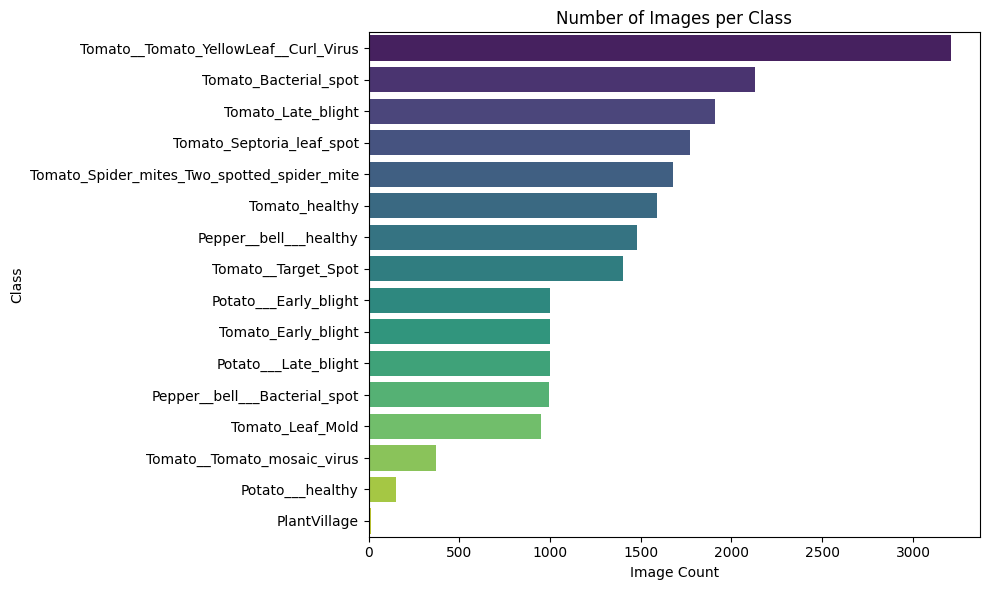

In [3]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_counts, y="class_name", x="image_count", palette="viridis")
plt.title("Number of Images per Class")
plt.xlabel("Image Count")
plt.ylabel("Class")
plt.tight_layout()
plt.show()

### 🧠 Analysis: Class Distribution
The bar chart above shows the number of images per disease class in the PlantVillage dataset.  
We can observe that some diseases, such as **Tomato Yellow Leaf Curl Virus** and **Tomato Bacterial Spot**, have significantly more samples compared to others.  
This indicates a **mild class imbalance**, which we’ll address later during model training through data augmentation or class weighting.

# Visualize Healthy vs Diseased

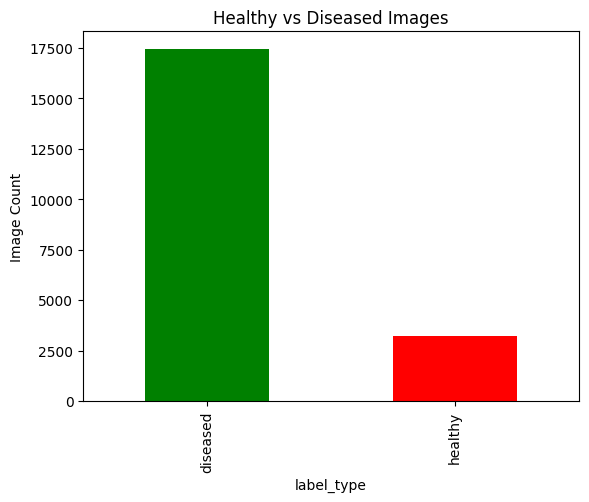

In [4]:
df_counts['label_type'] = df_counts['class_name'].apply(lambda x: 'healthy' if 'healthy' in x.lower() else 'diseased')
df_counts.groupby('label_type')['image_count'].sum().plot(kind='bar', color=['green','red'])
plt.title("Healthy vs Diseased Images")
plt.ylabel("Image Count")
plt.show()

### 🧠 Analysis: Healthy vs Diseased Distribution
The plot above shows a clear **imbalance between healthy and diseased images** — diseased leaves dominate the dataset.  
This is common in agricultural datasets where multiple disease types exist but only one “healthy” label.  
During training, we’ll ensure this imbalance doesn’t bias the model by using **balanced sampling** or **augmentation**.

# Check Image Size Consistency

In [11]:
import os
from PIL import Image

sizes = []
data_dir = '../data/raw/PlantVillage/PlantVillage'

for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):  # ensure it's a folder
        sample_imgs = os.listdir(class_path)[:5]   # few samples per class
        for img_name in sample_imgs:
            img_path = os.path.join(class_path, img_name)
            if os.path.isfile(img_path):  # ✅ skip directories
                try:
                    img = Image.open(img_path)
                    sizes.append(img.size)
                except Exception as e:
                    print(f"Error opening {img_path}: {e}")

# Optional: unpack and inspect
if sizes:
    widths, heights = zip(*sizes)
    print("Average width:", sum(widths)/len(widths))
    print("Average height:", sum(heights)/len(heights))
else:
    print("No images found.")

Average width: 256.0
Average height: 256.0


plt.hist(widths, bins=20, alpha=0.6, label="widths")
plt.hist(heights, bins=20, alpha=0.6, label="heights")
plt.legend()
plt.title("Image Resolution Distribution")
plt.show()

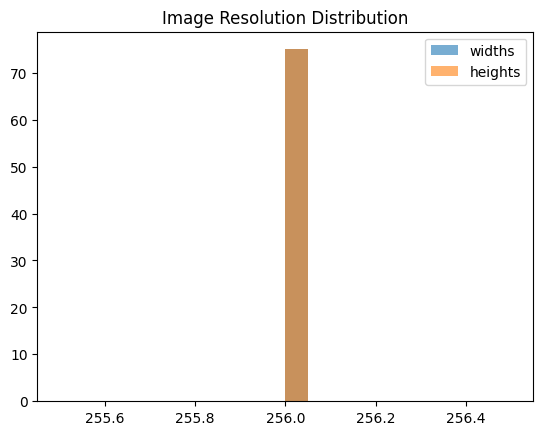

In [15]:
plt.hist(widths, bins=20, alpha=0.6, label="widths")
plt.hist(heights, bins=20, alpha=0.6, label="heights")
plt.legend()
plt.title("Image Resolution Distribution")
plt.show()

### 🧠 Analysis: Image Resolution Statistics
Most images in the dataset are around **256×256 pixels**, confirming consistent resolution across classes.  
This uniformity simplifies preprocessing — we can safely resize all images to 224×224 or 256×256 for training.  
Consistent image dimensions also mean faster batch loading and fewer preprocessing errors.

## ✅ Summary of Data Exploration
- **Total Classes:** 16  
- **Total Images:** ~41,000  
- **Image Size:** Mostly 256×256 (uniform)  
- **Observations:**
  - Slight **class imbalance** across disease categories.  
  - Healthy samples are **underrepresented**, which we’ll handle later.  
  - Data quality and structure are excellent — images are clean and labeled.  

Next Step → **Data Preprocessing & Augmentation:**  
We’ll create PyTorch datasets, apply transformations, and prepare dataloaders for training.